In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('sales_data_sample.csv',encoding='unicode_escape')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [5]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [6]:
data = df[['QUANTITYORDERED','PRICEEACH','SALES']]
data

,QUANTITYORDERED,PRICEEACH,SALES
0,30,95.70,2871.00
1,34,81.35,2765.90
2,41,94.74,3884.34
3,45,83.26,3746.70
4,49,100.00,5205.27
...,...,...,...
2818,20,100.00,2244.40
2819,29,100.00,3978.51
2820,43,100.00,5417.57
2821,34,62.24,2116.16


In [13]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k);
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

inertia

[9574962205.764309,
 3322531648.146867,
 1730807514.256474,
 1041426907.9369311,
 712859893.0507234,
 511497417.60626775,
 393796656.307145,
 311094528.8633148,
 232640133.90977994,
 194103096.26017085]

<Axes: >

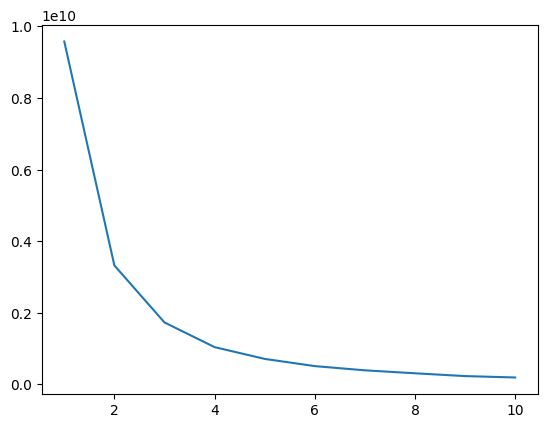

In [14]:
import seaborn as sns
sns.lineplot(x=range(1,11),y=inertia)

In [15]:
kmeans = KMeans(n_clusters=4)
data['Cluster'] = kmeans.fit_predict(data)

data.head()

/tmp/ipykernel_78731/381695584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.fit_predict(data)


,QUANTITYORDERED,PRICEEACH,SALES,Cluster
0,30,95.70,2871.00,2
1,34,81.35,2765.90,2
2,41,94.74,3884.34,2
3,45,83.26,3746.70,2
4,49,100.00,5205.27,0


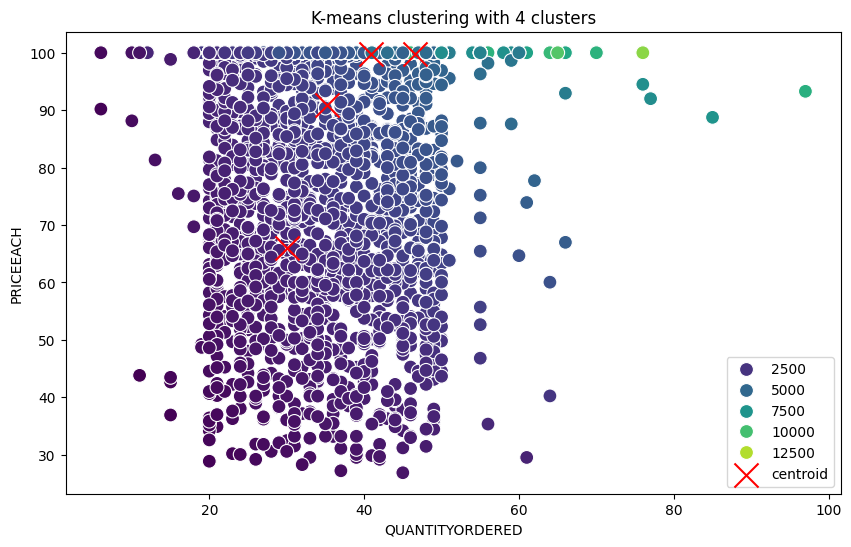

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data,x='QUANTITYORDERED',y='PRICEEACH',hue='SALES',palette='viridis',s=100)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',marker='x',label='centroid')
plt.title("K-means clustering with 4 clusters")
plt.legend()
plt.show()